In [1]:
import sys
import time
import numpy as np
from matplotlib import pyplot as plt
import logging

sys.path.append("../../")
from experiments.mwe.mwe_pytorch import time_transform

%matplotlib inline

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Go!

In [6]:
def take_time(*args, **kwargs):
    results = [time_transform(*args, **kwargs) for _ in range(3)]
    return np.mean(results), np.std(results)

In [7]:
blocks = [1,2,5,10]
xdims = [2,5,10,20,50,100,200,500,1000]

jacobian_means = []
jacobian_stds = []
det_means = []
det_stds = []

for block in blocks:
    for xdim in xdims:
        print("blocks = {}, xdim = {}".format(block, xdim))
        mean_jac, std_jac = take_time(features=xdim, batchsize=100, hidden_features=100, hidden_layers=block, calculate_full_jacobian=True)
        mean_det, std_det = take_time(features=xdim, batchsize=100, hidden_features=100, hidden_layers=block, calculate_full_jacobian=False)
        jacobian_means.append(mean_jac)
        jacobian_stds.append(std_jac)
        det_means.append(mean_det)
        det_stds.append(std_det)

blocks = np.asarray(blocks)
xdims = np.asarray(xdims)
jacobian_means = np.asarray(jacobian_means).reshape(len(blocks), -1)
jacobian_stds = np.asarray(jacobian_stds).reshape(len(blocks), -1)
det_means = np.asarray(det_means).reshape(len(blocks), -1)
det_stds = np.asarray(det_stds).reshape(len(blocks), -1)


blocks = 1, xdim = 2
blocks = 1, xdim = 5
blocks = 1, xdim = 10
blocks = 1, xdim = 20
blocks = 1, xdim = 50
blocks = 1, xdim = 100
blocks = 1, xdim = 200
blocks = 1, xdim = 500
blocks = 1, xdim = 1000
blocks = 2, xdim = 2
blocks = 2, xdim = 5
blocks = 2, xdim = 10
blocks = 2, xdim = 20
blocks = 2, xdim = 50
blocks = 2, xdim = 100
blocks = 2, xdim = 200
blocks = 2, xdim = 500
blocks = 2, xdim = 1000
blocks = 5, xdim = 2
blocks = 5, xdim = 5
blocks = 5, xdim = 10
blocks = 5, xdim = 20
blocks = 5, xdim = 50
blocks = 5, xdim = 100
blocks = 5, xdim = 200
blocks = 5, xdim = 500
blocks = 5, xdim = 1000
blocks = 10, xdim = 2
blocks = 10, xdim = 5
blocks = 10, xdim = 10
blocks = 10, xdim = 20
blocks = 10, xdim = 50
blocks = 10, xdim = 100
blocks = 10, xdim = 200
blocks = 10, xdim = 500
blocks = 10, xdim = 1000


## Plot

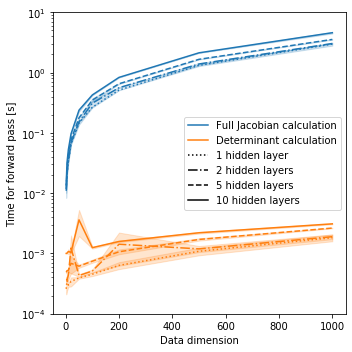

In [13]:
linestyles = [":", "-.", "--", "-"]
fig = plt.figure(figsize=(5,5))

for i, (block, ls) in enumerate(zip(blocks, linestyles)):
    plt.fill_between(xdims, jacobian_means[i] - jacobian_stds[i], jacobian_means[i]+jacobian_stds[i], color="C0", alpha=0.2)
    plt.plot(xdims, jacobian_means[i], c="C0", ls=ls)
    
    plt.fill_between(xdims, det_means[i] - det_stds[i], det_means[i]+det_stds[i], color="C1", alpha=0.2)
    plt.plot(xdims, det_means[i], c="C1", ls=ls)
    
plt.plot([], [], c="C0", ls="-", label="Full Jacobian calculation")
plt.plot([], [], c="C1", ls="-", label="Determinant calculation")
plt.plot([], [], c="black", ls=":", label="1 hidden layer")
plt.plot([], [], c="black", ls="-.", label="2 hidden layers")
plt.plot([], [], c="black", ls="--", label="5 hidden layers")
plt.plot([], [], c="black", ls="-", label="10 hidden layers")
plt.legend()

plt.xlabel("Data dimension")
plt.ylabel("Time for forward pass [s]")
plt.ylim(1.e-4,1.e1)
plt.yscale("log")
# plt.ylim(0.,None)

plt.tight_layout()
plt.savefig("simple_manifold_flow_timing.pdf")
